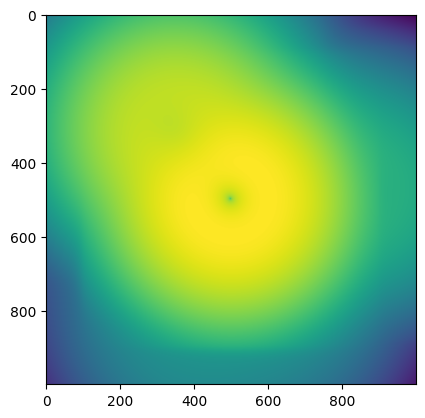

In [66]:
import scipy.ndimage as ndimage
from PIL import Image
from pathlib import Path
import h5py
import numpy as np
path="/home/jyang/data/Flamingo/L0200N0360/halo_particles/"
f=h5py.File(path+'1.hdf5','r')
Coord_g=np.array(f['PartType1']["Coordinates"])
xray_lum=np.array(f['PartType1']['xray_lum_erosita_low'])+np.array(f['PartType1']['xray_lum_erosita_high'])
x_dm=np.array(f['PartType2']["Coordinates"]).T[0]
f.close()
r=np.max(x_dm)

hist2d=np.histogram2d(Coord_g[:,0]/r,Coord_g[:,1]/r,bins=1000,range=[[-1,1],[-1,1]],weights=xray_lum)

img = hist2d[0]
#img_smooth=ndimage.gaussian_gradient_magnitude(img,sigma=1,mode='constant')
#img_smooth+=ndimage.gaussian_gradient_magnitude(img,sigma=2,mode='constant')
#img_smooth+=ndimage.gaussian_gradient_magnitude(img,sigma=8,mode='constant')
#img_smooth+=ndimage.gaussian_gradient_magnitude(img,sigma=32,mode='constant')
img_smooth=ndimage.gaussian_gradient_magnitude(img,sigma=100,mode='constant')
#img_smooth=ndimage.gaussian_filter(img,sigma=32,mode='constant')
import matplotlib.pyplot as plt
plt.imshow(np.log10(img_smooth))